In [1]:
from wmse_sequence import WMSESequencialModel, WMSESequencialModelBuilder

import matplotlib.pyplot as plot

In [2]:
N = 17

In [3]:
models = []

head_size = 2

for tailsize in range(N):
    model = WMSESequencialModel(
        WMSESequencialModelBuilder(entropy_loss = 3.0)   
            .add_pike(head_size + 5)
            .add_pike(head_size + 5 + tailsize)
            .add_pike(head_size + 5 + tailsize)
            .add_pike(head_size + 5)
            .add_connection(1, head_size, 4, 1.0, 3.0, 1)
            .add_connection(2, tailsize + 1, 2, 1.0, 3.0, 2)
            .add_connection(3, head_size, 4, 1.0, 3.0, 1)
    )
    models.append(model)

In [4]:
convergence_curve_1 = []
convergence_curve_2 = []

for tailsize in range(N):
    print 'Processing tailsize = %d' % tailsize
    convergence_curve_1.append(models[tailsize].get_condition_temperature(0.5, 1, 0.03, t_eps = 0.001))
    convergence_curve_2.append(models[tailsize].get_condition_temperature(0.5, 2, 0.03, t_eps = 0.001))

Processing tailsize = 0
Processing tailsize = 1
Processing tailsize = 2
Processing tailsize = 3
Processing tailsize = 4
Processing tailsize = 5
Processing tailsize = 6
Processing tailsize = 7
Processing tailsize = 8
Processing tailsize = 9
Processing tailsize = 10
Processing tailsize = 11
Processing tailsize = 12
Processing tailsize = 13
Processing tailsize = 14
Processing tailsize = 15
Processing tailsize = 16


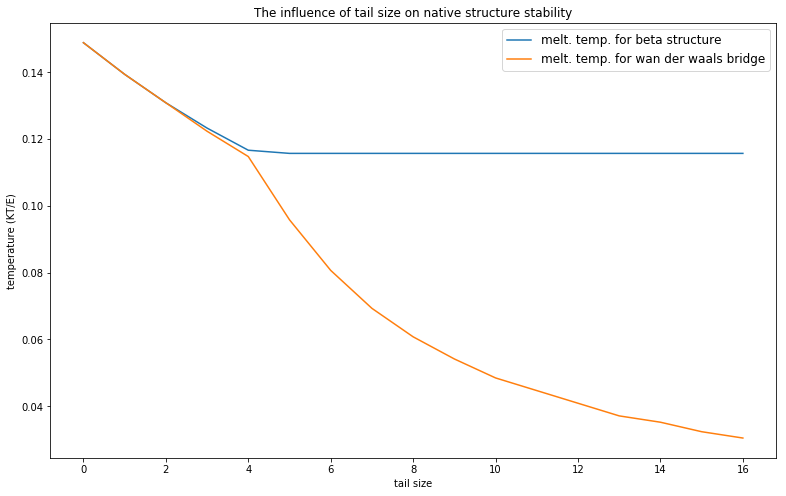

In [5]:
plot.figure(figsize=(13, 8))
plot.plot(convergence_curve_1, label='melt. temp. for beta structure')
plot.plot(convergence_curve_2, label='melt. temp. for wan der waals bridge')
plot.title('The influence of tail size on native structure stability')
plot.legend(fontsize='large', )
plot.ylabel('temperature (KT/E)')
plot.xlabel('tail size')
plot.show()